In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os, sys, json
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from sklearn.model_selection import train_test_split
sys.path.append('..')
from oads_access.oads_access import *

import torch.optim as optim
import torch
from torch import nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

os.environ['MKL_THREADING_LAYER'] = 'GNU'
torch.multiprocessing.set_start_method('spawn')

In [2]:
%matplotlib widget
home = '../../data/oads/mini_oads_2/'
oads = OADS_Access(home)

# Data Augmentation

In [121]:
crops = oads.get_data_iterator(max_number_images=10)

100%|██████████| 1/1 [00:02<00:00,  2.30s/it]


In [122]:
len(crops)

10

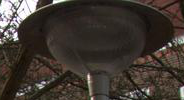

In [4]:
crops[0][0]

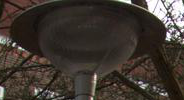

In [21]:
# Flip vertically
Image.fromarray(np.array(crops[0][0])[::,::-1,::])


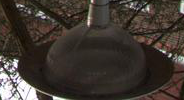

In [22]:
# Flip horizontally
Image.fromarray(np.array(crops[0][0])[::-1,::,::])


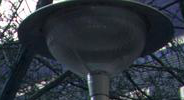

In [23]:
# Flip color channels
Image.fromarray(np.array(crops[0][0])[::,::,::-1])

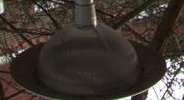

In [36]:
# Flip color channels
Image.fromarray(np.rot90(np.array(crops[0][0]), k=2))

In [77]:
_x = oads.apply_custom_data_augmentation(crops, oads.rotate_image_90c)

In [118]:
n_images = 4
arr = np.where(np.arange(10) >= n_images, False, True)
np.random.shuffle(arr)
np.array(list(range(10)))[arr]

array([2, 5, 7, 9])